In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/CreditScoring.csv')

In [8]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [10]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

In [11]:
df.status = df.status.map(status_values)

In [12]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [13]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

In [14]:
df.home = df.home.map(home_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,1,1,1,46,107,0,0,310,910


In [15]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

In [16]:
df.marital = df.marital.map(marital_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,1,3,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,1,1,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,2,3,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,1,1,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,1,1,46,107,0,0,310,910


In [17]:
record_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(record_values)

In [18]:
job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [19]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [20]:
for c in ['income', 'assets', 'debt']:
  df[c] = df[c].replace(to_replace=99999999, value = np.nan)

In [21]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [22]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [23]:
df = df[df.status != 'unk']

In [24]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [25]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
df_val.status

2404         ok
908          ok
2464         ok
1663    default
1518         ok
         ...   
1968         ok
4371         ok
1324    default
4081         ok
2935         ok
Name: status, Length: 891, dtype: object

In [26]:
len(df_train), len(df_val), len(df_val)

(2672, 891, 891)

In [27]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [28]:
y_train

array([ True,  True, False, ..., False, False, False])

In [29]:
del df_train['status']
del df_val['status']

In [30]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

In [31]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [32]:
dv = DictVectorizer(sparse=False)

In [33]:
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [34]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [35]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6685264343319367

In [36]:
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False
|--- records=no >  0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True



In [37]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

train auc 0.7054989859726213


In [38]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('train auc', auc)

train auc 0.6685264343319367


In [39]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
  dt = DecisionTreeClassifier(max_depth=depth)

  dt.fit(X_train, y_train)
  y_pred = dt.predict_proba(X_val)[:, 1]
  auc = roc_auc_score(y_val, y_pred)
  print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.761
  10 -> 0.700
  15 -> 0.671
  20 -> 0.652
None -> 0.664


In [40]:
for m in [4, 5 ,6]:
  print('depth: %s' % m)

  for s in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (s, auc))
  print()

depth: 4
   1 -> 0.761
   5 -> 0.761
  10 -> 0.761
  15 -> 0.764
  20 -> 0.761
  50 -> 0.753
 100 -> 0.756
 200 -> 0.747

depth: 5
   1 -> 0.767
   5 -> 0.768
  10 -> 0.762
  15 -> 0.773
  20 -> 0.774
  50 -> 0.768
 100 -> 0.763
 200 -> 0.759

depth: 6
   1 -> 0.746
   5 -> 0.760
  10 -> 0.778
  15 -> 0.785
  20 -> 0.774
  50 -> 0.770
 100 -> 0.776
 200 -> 0.768



In [41]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [42]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=3)

In [43]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [44]:
aucs = []

for i in range(10, 201, 10):
  rf = RandomForestClassifier(n_estimators=i, random_state=4)
  rf.fit(X_train, y_train)

  y_pred = rf.predict_proba(X_val)[:, 1]
  auc = roc_auc_score(y_val, y_pred)
  print('%s -> %.3f' % (i, auc))

  aucs.append(auc)

10 -> 0.780
20 -> 0.801
30 -> 0.806
40 -> 0.812
50 -> 0.814
60 -> 0.816
70 -> 0.818
80 -> 0.818
90 -> 0.819
100 -> 0.820
110 -> 0.819
120 -> 0.819
130 -> 0.819
140 -> 0.819
150 -> 0.819
160 -> 0.819
170 -> 0.820
180 -> 0.819
190 -> 0.819
200 -> 0.820


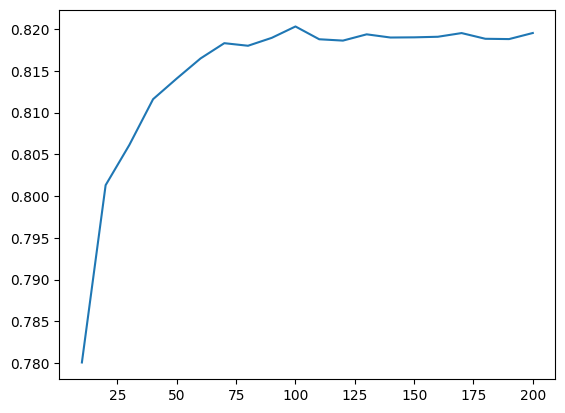

In [45]:
plt.plot(range(10, 201, 10), aucs)

In [46]:
all_aucs = {}

for depth in [5, 10, 20]:
  print('depth: %s' % depth)
  aucs = []

  for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)
  all_aucs[depth] = aucs
  print()

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807


KeyboardInterrupt: 

In [ ]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

In [53]:
all_aucs = {}

for m in [3, 5, 10, 25, 50, 100]:
  print('min_samples_leaf: %s' % m)

  aucs = []

  for i in range(10, 201, 20):
    rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)
  all_aucs[m] = aucs
  print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820

min_samples_leaf: 25
10 -> 0.799
30 -> 0.813
50 -> 0.809
70 -> 0.811
90 -> 0.811
110 -> 0.812
130 -> 0.813
150 -> 0.813
170 -> 0.813
190 -> 0.814

min_samples_leaf: 50
10 -> 0.799
30 -> 0.804
50 -> 0.805
70 -> 0.805
90 -> 0.806
110 -> 0.806
130 -> 0.806
150 -> 0.806
170 -> 0.805
190 -> 0.806

min_samples_leaf: 100
10 -> 0.792
30 -> 0.802
50 -> 0.798
70 -> 0.798
90 -> 0.800
110 -> 0.800
130 -> 0.801
150 -> 0.800
170 -> 0.799
190 -> 0.800

min_samples_leaf: 100
10 -> 0.792
30 -> 0.802
50 -> 0.798
70 -> 0.798
90 -> 0.800
110 -> 0.800
130 -> 0.801
150 -> 0.80

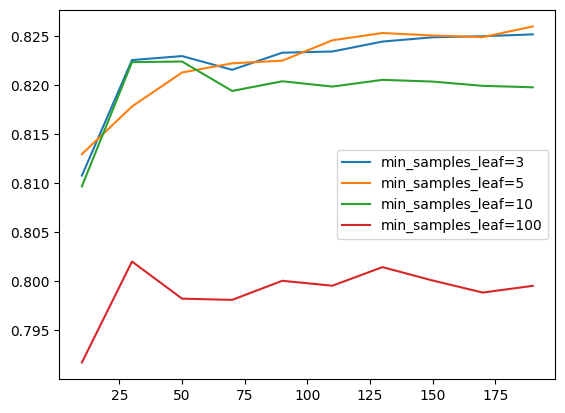

In [55]:
num_trees = list(range(10, 210, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.plot(num_trees, all_aucs[100], label='min_samples_leaf=100')

plt.legend()


In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dval)
y_pred[:10]

In [ ]:
roc_auc_score(y_val, y_pred)

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 16,
    'seed': 1,
    'silent': 1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 16,
    'seed': 1,
    'silent': 1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist, verbose_eval=10)

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
df_val.status

y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [ ]:
dict_train = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)


In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 1,
    'nthread': 32,
    'silent': 1
}

In [ ]:
num_trees = 160


In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

In [ ]:
y_pred_xgb = model.predict(dval)
roc_auc_score(y_test, y_pred_xgb)